# Data from Kaggle and the Five Thirty Eight Websites

## Rafael Djamous 

https://rafaeldjamous.github.io

https://github.com/RafaelDjamous/rafaeldjamous.github.io

# Write Up

In the project, we decided to collaborate with a friend in order to get the work done. We first met in a zoom and went through the list of websites provided so that we could extract the data from them. We focused on the sources that provided us with interesting data as well as those that would easily be extracted. We finally chose to settle with data from Kaggle and the Five Thirty Eight websites. The extraction methods for the data from these sites is different so let us look at them one at a time. We also unanimously decided to use Jupyter notebook for data reading and manipulation. On top of that, we agreed to upload the code to my Github account.

### Five Thirty Eight website

The data obtained from this website was the National Hockey League (NHL) data. It contains data for the team ratings, match ratings and scores between different teams among others. The website provides a link the csv file; we therefore read the file directly using the read_csv method of Pandas.  Our main interest was to find out the highest rated games in NHL. We did this by ranking sorting the dataframe based on the 'game_overall_rating' column and taking the first 10 samples of the sorted data using the ‘head’ method of a Pandas dataframe. 

We then plotted a bar graph to show the overall game ratings using matplotlib library. It showed that there were four tiers in the rankings. Below is the output. 

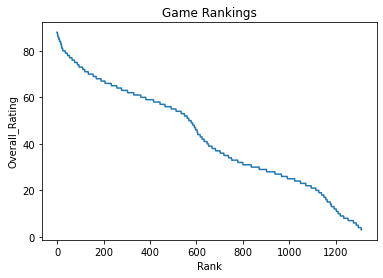

Further, we were able to note from the data, that the higher the game quality and the game importance ratings, the higher the game overall rating. 

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For Exploratory data analysis, we checked for the data types in the data, the correlation between them and also the measures of central tendency for the numerical variables. We have the following variables: float64(11), int64(6), object(7)

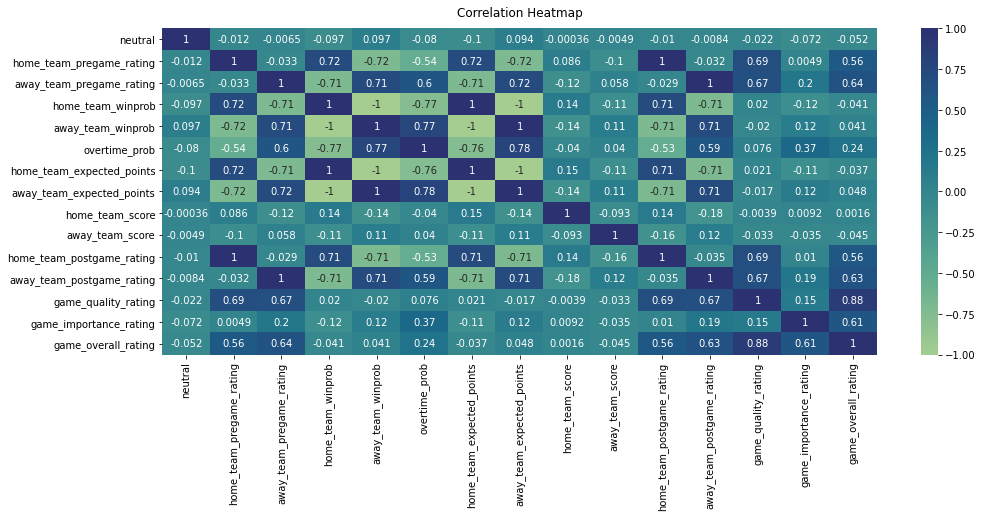

### Kaggle

The data obtained from Kaggle is the World happiness data. It contains data such as the Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity and Perceptions of corruption. 

Extraction of data from Kaggle is quite different when compared to the Four Thirty Eight website. We make use of the opendatasets library to download the dataset from Kaggle. This prompts us to provide the details like the Kaggle username and the key, we are obtained in a json file downloaded from Kaggle under the ‘Account’ option. After provideng these details, the dataset is downloaded and exracted to our working directory. From here, we can then read the csv file using the read_csv method of Pandas. 

In the EDA, we checked for the data types in the data, the correlation between them and also the measures of central tendency for the numerical variables. All are numerical variables except 'Country or region'. The data is also distributed over 156 different countries.

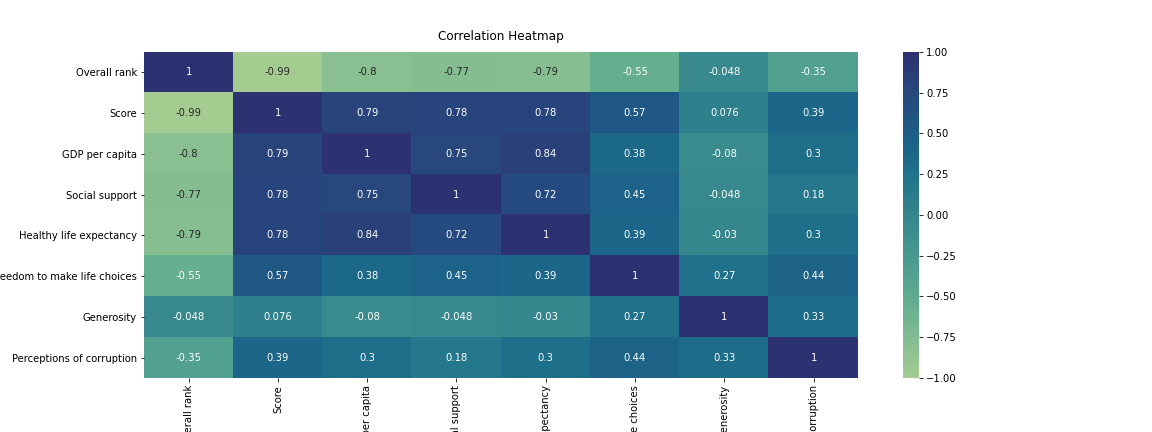

We can see that there is a high correlation between 'Score' and GDP per capita, Social support, Healthy life expectancy & Freedom to make life choices


Our main interest here was to find the correlation between the happiness score and the GDP per capita. To investigate this, we made a scatterplot using seaborn and this included a regression line. The output graph showed that the two are directly proportional in most parts of the world. Below is the output graph:

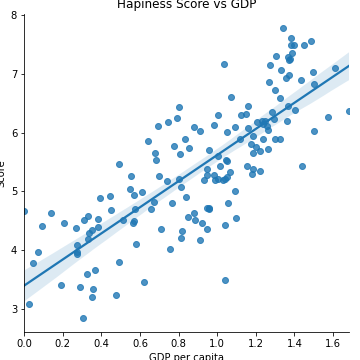

We also noted that, in the countries that the freedom to make life choices was high, the happiness score was also high. There is also a high positive correlation between hapiness score and  Social support, Healthy life expectancy & Freedom to make life choices

This is illustrated below:

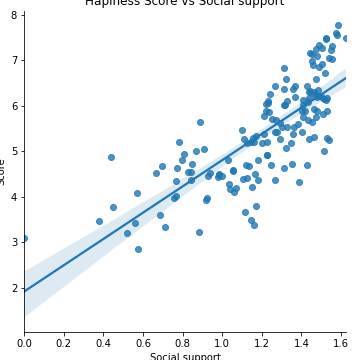

- These variables with high correlation with 'Score' can be used to predict it using machine learning models like Multiple Linear Regression

### Challenges Faced

The main challenge we faced was in the extraction of data from Kaggle since we did not know that a json file from Kaggle was required so as to download the data in the first part.

# Code

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data from FiveThirtyEight website

In [51]:
# Data from FiveThirtyEight website
# We want to investigate the top 10 games that have got the highest overall ratings
nhl_url = 'https://projects.fivethirtyeight.com/nhl-api/nhl_elo_latest.csv'
nhl_df = pd.read_csv(nhl_url)
nhl_df.head()

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
0,2023,2022-10-07,0,1,post,NaN,Nashville Predators,San Jose Sharks,NSH,SJS,...,0.234345,1.258314,0.976030,4.0,1.0,1510.044255,1446.464381,15,41,28
1,2023,2022-10-08,0,1,post,NaN,San Jose Sharks,Nashville Predators,SJS,NSH,...,0.233053,0.956634,1.276419,2.0,3.0,1444.546428,1511.962208,15,43,29
2,2023,2022-10-11,0,0,post,NaN,New York Rangers,Tampa Bay Lightning,NYR,TBL,...,0.238935,1.193826,1.045109,3.0,1.0,1554.002969,1567.724755,97,24,60
3,2023,2022-10-11,0,0,post,NaN,Los Angeles Kings,Vegas Golden Knights,LAK,VEG,...,0.240107,1.177400,1.062707,3.0,4.0,1498.528556,1531.054886,60,77,68
4,2023,2022-10-12,0,0,post,NaN,Washington Capitals,Boston Bruins,WSH,BOS,...,0.239010,1.192780,1.046230,2.0,5.0,1521.075399,1552.242965,84,54,69


In [52]:
nhl_df.info() #Let us look at the data types present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     1312 non-null   int64  
 1   date                       1312 non-null   object 
 2   playoff                    1312 non-null   int64  
 3   neutral                    1312 non-null   int64  
 4   status                     1312 non-null   object 
 5   ot                         52 non-null     object 
 6   home_team                  1312 non-null   object 
 7   away_team                  1312 non-null   object 
 8   home_team_abbr             1312 non-null   object 
 9   away_team_abbr             1312 non-null   object 
 10  home_team_pregame_rating   1312 non-null   float64
 11  away_team_pregame_rating   1312 non-null   float64
 12  home_team_winprob          1312 non-null   float64
 13  away_team_winprob          1312 non-null   float

- We have the following variables: float64(11), int64(6), object(7)

In [53]:
del nhl_df['ot'] #This column has a lot of missing values so let us get rid of it completely
del nhl_df['season'] 
del nhl_df['playoff'] 

In [54]:
nhl_df = nhl_df.dropna()

In [55]:
#Measures of central tendency for the numerical variables
nhl_df.describe()

,neutral,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.014706,1504.662114,1504.399756,0.568454,0.431546,0.232395,1.237757,0.994639,3.283088,3.080882,1504.363438,1504.698431,47.069853,35.665441,41.132353
std,0.120595,45.816109,46.070542,0.091043,0.091043,0.007918,0.158667,0.164847,1.658259,1.685865,45.925664,46.106044,31.464598,19.321952,19.734888
min,0.000000,1428.095502,1429.876230,0.313701,0.243427,0.211062,0.779021,0.646538,0.000000,0.000000,1428.095502,1428.861986,0.000000,4.000000,3.000000
25%,0.000000,1456.311873,1452.990702,0.498650,0.362839,0.227168,1.119586,0.870481,2.000000,2.000000,1456.525705,1454.665468,20.000000,20.000000,24.750000
50%,0.000000,1510.934640,1511.403109,0.571949,0.428051,0.234045,1.244628,0.990692,3.000000,3.000000,1510.934640,1512.938157,44.000000,31.000000,39.000000
75%,0.000000,1543.986880,1542.855201,0.637161,0.501350,0.238602,1.356781,1.124328,4.250000,4.000000,1543.790424,1542.616471,73.250000,48.250000,59.000000
max,1.000000,1599.945541,1596.453231,0.756573,0.686299,0.244067,1.564525,1.441902,8.000000,8.000000,1599.945541,1598.967378,100.000000,93.000000,79.000000


- The above table shows the value counts, mean, standard deviation and the percentiles for all the columns that are numerical in the dataframe

In [56]:
nhl_df.corr()

,neutral,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
neutral,1.000000,-0.014515,-0.005023,-0.097908,0.097908,-0.075056,-0.101672,0.094256,-0.002442,-0.005872,-0.012628,-0.006865,-0.022639,-0.069144,-0.050436
home_team_pregame_rating,-0.014515,1.000000,-0.026328,0.712566,-0.712566,-0.538439,0.712912,-0.712049,0.078847,-0.115932,0.996647,-0.025344,0.692353,-0.003207,0.549884
away_team_pregame_rating,-0.005023,-0.026328,1.000000,-0.713436,0.713436,0.608364,-0.712281,0.714799,-0.128819,0.059661,-0.023701,0.996676,0.675734,0.215739,0.644340
home_team_winprob,-0.097908,0.712566,-0.713436,1.000000,-1.000000,-0.778619,0.999915,-0.999828,0.146997,-0.120516,0.708340,-0.710370,0.014654,-0.135411,-0.055119
away_team_winprob,0.097908,-0.712566,0.713436,-1.000000,1.000000,0.778619,-0.999915,0.999828,-0.146997,0.120516,-0.708340,0.710370,-0.014654,0.135411,0.055119
overtime_prob,-0.075056,-0.538439,0.608364,-0.778619,0.778619,1.000000,-0.770739,0.789876,-0.040831,0.067294,-0.530058,0.600827,0.081392,0.375272,0.248433
home_team_expected_points,-0.101672,0.712912,-0.712281,0.999915,-0.999915,-0.770739,1.000000,-0.999532,0.148420,-0.121264,0.708795,-0.709325,0.016293,-0.130346,-0.051344
away_team_expected_points,0.094256,-0.712049,0.714799,-0.999828,0.999828,0.789876,-0.999532,1.000000,-0.144818,0.119950,-0.707683,0.711592,-0.011773,0.143484,0.061352
home_team_score,-0.002442,0.078847,-0.128819,0.146997,-0.146997,-0.040831,0.148420,-0.144818,1.000000,-0.076858,0.133840,-0.183685,-0.011837,0.010798,-0.003968
away_team_score,-0.005872,-0.115932,0.059661,-0.120516,0.120516,0.067294,-0.121264,0.119950,-0.076858,1.000000,-0.174144,0.117875,-0.033985,-0.010494,-0.033042


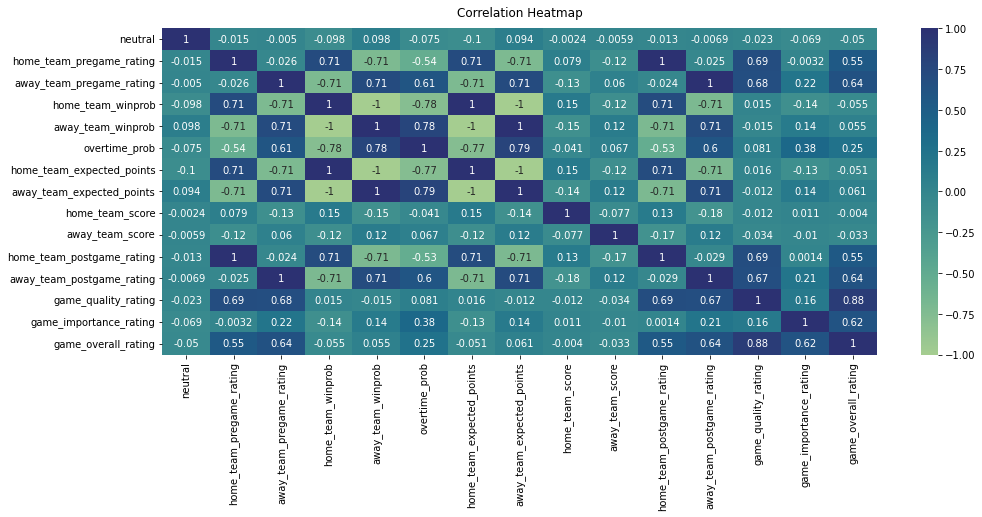

In [57]:
#Let us visualize this   
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(nhl_df.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('Heatmap_nhl.png')

- We can see that there is a high correlation between 'game_overall_rating' and home_team_pregame_rating, away_team_pregame_rating, home_team_postgame_rating, away_team_postgame_rating, game_quality_rating and game_importance_rating
- These columns can therefore be used to predict the game_overall_rating using 'Multiple Linear Regression'

In [58]:
#Sorting the games in descending order based on'game_overall_rating'
sorted_nhl_df = nhl_df.sort_values(by=['game_overall_rating'], ascending=False)
sorted_nhl_df.head()

,date,neutral,status,home_team,away_team,home_team_abbr,away_team_abbr,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,...,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
207,2022-11-09,0,post,Washington Capitals,Pittsburgh Penguins,WSH,PIT,1517.685835,1520.377174,0.567665,...,0.235842,1.237293,0.998549,1.0,4.0,1512.319033,1525.743975,65,93,79
268,2022-11-17,0,post,Minnesota Wild,Pittsburgh Penguins,MIN,PIT,1530.020879,1522.685338,0.581772,...,0.234121,1.261459,0.972662,4.0,6.0,1525.466552,1527.239665,74,76,75
240,2022-11-13,0,post,Tampa Bay Lightning,Washington Capitals,TBL,WSH,1561.162062,1517.586075,0.631502,...,0.227973,1.347012,0.880961,6.0,3.0,1564.416931,1514.331207,87,61,74
250,2022-11-15,0,post,Pittsburgh Penguins,Toronto Maple Leafs,PIT,TOR,1527.811300,1545.567872,0.546269,...,0.238444,1.200728,1.037716,2.0,5.0,1522.685338,1550.693834,84,62,73
221,2022-11-11,0,post,Toronto Maple Leafs,Pittsburgh Penguins,TOR,PIT,1548.702467,1525.743975,0.603479,...,0.231457,1.298736,0.932721,2.0,4.0,1543.940873,1530.505570,85,62,73


In [59]:
team_pairs = pd.DataFrame() #We create a dataframe that will show us only the home and away team pairs plus the ratings
team_pairs['home_team'] = sorted_nhl_df['home_team']
team_pairs['away_team'] = sorted_nhl_df['away_team']
team_pairs['overall_rating'] = sorted_nhl_df['game_overall_rating']
team_pairs = team_pairs.reset_index().head(10)
del team_pairs['index']
team_pairs.head(10)

,home_team,away_team,overall_rating
0,Washington Capitals,Pittsburgh Penguins,79
1,Minnesota Wild,Pittsburgh Penguins,75
2,Tampa Bay Lightning,Washington Capitals,74
3,Pittsburgh Penguins,Toronto Maple Leafs,73
4,Toronto Maple Leafs,Pittsburgh Penguins,73
5,Washington Capitals,Tampa Bay Lightning,72
6,Florida Panthers,Washington Capitals,71
7,Washington Capitals,Boston Bruins,69
8,New York Rangers,New York Islanders,69
9,St. Louis Blues,New York Islanders,68


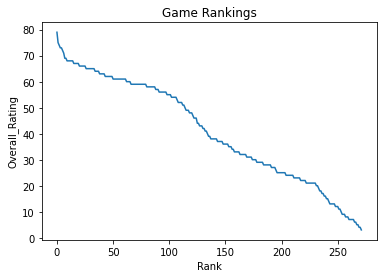

In [60]:
#Visualizing all the ratings
plt.plot(sorted_nhl_df[['home_team', 'away_team', 'game_overall_rating']]['game_overall_rating'].values)
plt.ylabel('Overall_Rating')
plt.xlabel('Rank')
plt.title('Game Rankings')
plt.savefig('OverallGameRatingsAll.png')

- The plot shows all the game rankings

### Kaggle Dataset

- The aim is to find out the correlation between hapiness score and the GDP per capita in various countries

In [61]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import opendatasets as od

In [63]:
datasets = 'https://www.kaggle.com/datasets/unsdsn/world-happiness'

In [64]:
od.download(datasets)

Skipping, found downloaded files in "./world-happiness" (use force=True to force download)


In [65]:
df = pd.read_csv('./world-happiness/2019.csv')

In [66]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [67]:
df.info() #Let us look at the data types present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


- All are numerical variables except 'Country or region'

In [68]:
#let us check the distribution of data over countries
print('Total Number: ', len(df['Country or region'].value_counts()))
df['Country or region'].value_counts()

Total Number:  156


Finland                1
Venezuela              1
Jordan                 1
Benin                  1
Congo (Brazzaville)    1
                      ..
Latvia                 1
South Korea            1
Estonia                1
Jamaica                1
South Sudan            1
Name: Country or region, Length: 156, dtype: int64

- The data is distributed over 156 different countries

In [69]:
#Next we check the central measures of tendency for the numerical variables
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [70]:
#We next check the correlation between the variables
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


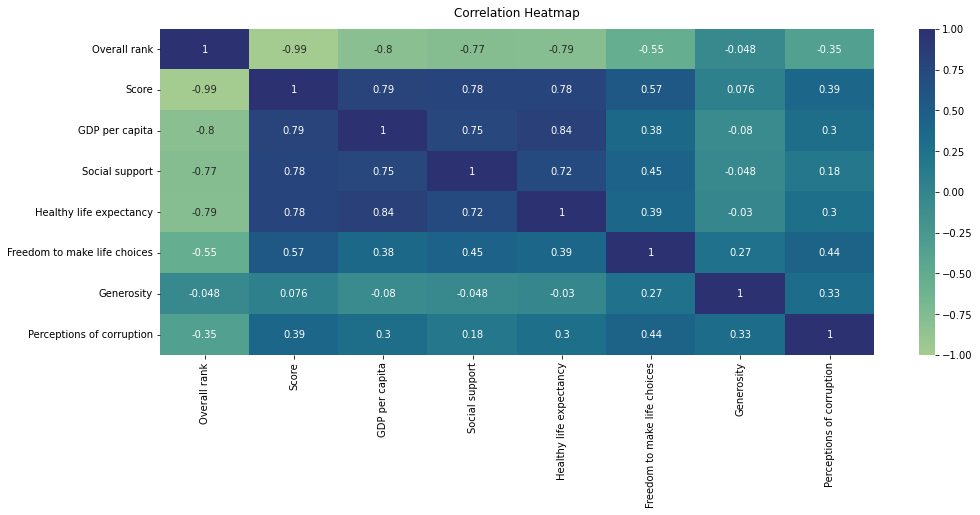

In [71]:
#Let us visualize this   
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('Heatmap_df.png')

- We can see that there is a high correlation between 'Score' and GDP per capita, Social support, Healthy life expectancy & Freedom to make life choices
- These variables can therefore be used to predict the 'Score' variable using a model like Multiple Linear Regression

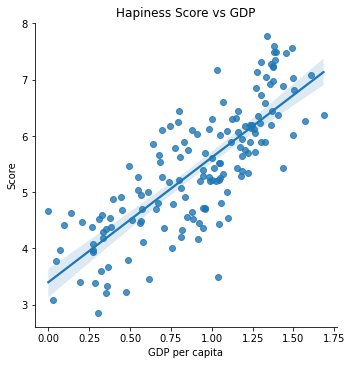

In [72]:
sns.lmplot(x='GDP per capita', y='Score',data=df,fit_reg=True) 
plt.title('Hapiness Score vs GDP')
plt.savefig('HapinessScoreVsGDP.png')
plt.show()

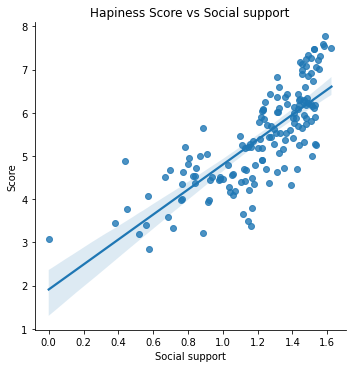

In [73]:
sns.lmplot(x='Social support', y='Score',data=df,fit_reg=True) 
plt.title('Hapiness Score vs Social support')
plt.savefig('HapinessScoreVsSocialsupport.png')
plt.show()

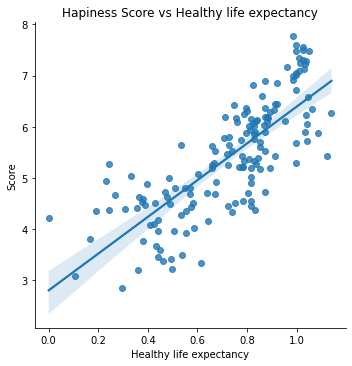

In [74]:
sns.lmplot(x='Healthy life expectancy', y='Score',data=df,fit_reg=True) 
plt.title('Hapiness Score vs Healthy life expectancy')
plt.savefig('HapinessScoreVsHealthylifeexpectancy.png')
plt.show()

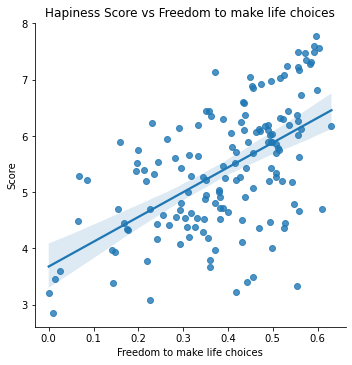

In [75]:
sns.lmplot(x='Freedom to make life choices', y='Score',data=df,fit_reg=True) 
plt.title('Hapiness Score vs Freedom to make life choices')
plt.savefig('HapinessScoreVsFreedomtomakelifechoices.png')
plt.show()

## Conclusion

From the project, we were able to import different sets of data and also extract meaningful insights from them.

For the first case, which is the data from FiveThirtyEight website, we were able to first read data from a link using Pandas. The data contained different data types which included 11 which were float type, 6 integers and 7 which were object type. It is noted that there is a high correlation between the columns for the game ratings and the win probability columns. In addition to that, when the game ratings are plotted, we note that the rankings of the teams are almost in groups; that is, highly ranked, averagely ranked and lowly ranked games. Matplotlib library was utilized in visualizing the game rankings from high to low.

From this part, I was able to learn how to properly use pandas in importing the data from a website link, know the data types in the data, and compute the measures of central tendency in the data. Filtering out columns of a dataframe and ranking them is another concept that I learnt too.  In addition to that, I understood how to find the correlation between the data variables. I also knew how to visualize the correlation of the variables using Seaborn. 

In the second case where the data was going to be obtained from Kaggle. The data was first downloaded using the Opendatasets library and then read using pandas. The data types it contained were 7 float variables, one integer and also one object type variable. The object type variable contained the list of countries. The measures of central tendency were also checked. The observation was that there was a high correlation between Happiness score and GDP per capita, social support, Healthy life expectancy & Freedom to make life choices. These columns could therefore be used to predict score which is the target variable. 

In this part, I understood how to make use of the Opendatasets library to download data from Kaggle. To download, a json file from Kaggle, which contained the username and the key was required; we therefore downloaded it. The other concept reinforced here was checking the measures of central tendency like the mean, median and percentiles with Pandas, checking the correlation between the variables and visualizing this using the correlation heatmap with seaborn. Seaborn library was also utilized in visualizing the data and drawing a regression line, especially for those columns that had a positive correlation with Happiness score.

The project was therefore a success coupled with great learning experience and activities that sharpened my programming skills.

In [2]:
%%shell
jupyter nbconvert --to html /content/milestone2_project.ipynb

[NbConvertApp] Converting notebook /content/milestone2_project.ipynb to html
[NbConvertApp] Writing 1025707 bytes to /content/milestone2_project.html
